<a href="https://colab.research.google.com/github/esemsc-db24/Handsonmlrep/blob/main/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# Imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import sys
from torchvision import datasets, transforms
import torch
from torchvision.transforms import Lambda

In [78]:
#Mounting
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Assessment 1**

For our first assessment, our goal is to solve an imputation problem: we will create a neural network architecture that learns how to recover missing portions of an image.

This is an important problem in magnetic resonance imaging (MRI), where patient scans are often limited to a few areas to avoid lengthy scanning times.

In particular, we are going to focus on images of human heads. We have managed to gain access to one hundred images of patient's heads but, unfortunately, these images have a significant portion of missing information. Your goal during the assessment is to design a neural network that can recover these missing portions.

<br>

---

<br>

We do not have access to the labels for the images we want to recover, so we will have to be a bit creative to obtain a workable dataset on which to train our neural network.

Fortunately for us, we have access to a generative model that has been trained to produce realistic-looking MRI images of patient's heads. Using this model, you will create an appropriate dataset to train your architecture. We have provided you with the basic setup code to start using this generative model in **Question 1** below.

The corrupted images that we want to recover are contained in the numpy file `test_set.npy` of this repository. The file contains 100 patient images with a size of 64x64 pixels.

The architecture that you design in this assessment should use the artificially-generated dataset in order to recover the missing information in the images contained in `test_set.npy`.

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Using the provided image-generation network, create a dataset of brain images that will later be used to train your chosen architecture.

Given that you will likely want to use this dataset multiple times during training, we recommend that you save the generated images to an appropriate folder in your GDrive.

Once you have generated your dataset, load and display ten of your generated images here.

We have also provided you with some corrupted images in the file `test_set.npy` of this repository. You should also load and display ten of these corrupted images here.

Below, we have provided template code, including some required downloads and installations, so that you can easily use the trained generative model. Sample generation in this model is done using the function `generate`, and is controlled by some input arguments. It is your job to figure out a sensible set of parameters that will produce images that are useful for the requirements of your task.

<br>

In [79]:
# Pull and install necessary files
!gdown 1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY # run.sh
!gdown --folder 1-PJmUzB9HN3mCKsl7qKGlUynltY5ttp7 # ese-invldm
!gdown --folder 1-V9EOGuiYOiszIg3pA15D9ThwXO1gr4E # files
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Downloading...
From (original): https://drive.google.com/uc?id=1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY
From (redirected): https://drive.google.com/uc?id=1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY&confirm=t&uuid=34ff22aa-0523-473a-a6b8-d9f61b56e391
To: /content/run.sh
100% 530/530 [00:00<00:00, 2.92MB/s]
Retrieving folder contents
Retrieving folder 1Kc3TJ6yXVM6ugT_i4OBX5yH0Bf_oTYas ese_invldm
Processing file 1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG __init__.py
Processing file 1IjiAQ0hqDfpqYxh4zSKEfsAh7iV8226i ese_invldm.py
Processing file 1JlBHxSRrEUewrHmGcf4S8hh02Sz-xT66 setup.py
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG
From (redirected): https://drive.google.com/uc?id=1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG&confirm=t&uuid=76601da7-60f8-4d8f-881d-f72b925e8239
To: /content/ese-invldm/ese_invldm/__init__.py
100% 32.0/32.0 [00:00<00:00, 155kB/s]
Downloading.

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
test_set = np.load("/content/drive/MyDrive/Exam_1/dl-module-coursework-1-esemsc-db24/test_set.npy")

(100, 1, 64, 64)


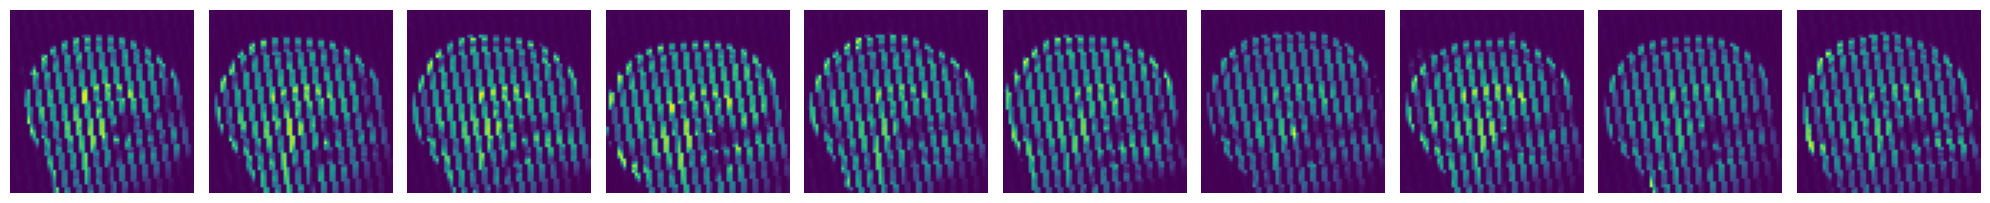

In [82]:
print(test_set.shape) # each image is 64x64, 100 of them with one channel

a = 50
b = 60
fig, axes = plt.subplots(1, b - a, figsize=(20, 20))  # Create 10 subplots in a single row

for idx, img_idx in enumerate(range(a, b)):
    axes[idx].imshow(test_set[img_idx, 0])
    axes[idx].axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()

# After having a look at the picture, I realised there is a:
# Randomcrop because I can sesome of the pictures are more or less zoomed in
# I can also see there is some pattern where pixels next to each other have not been removed
# I can see that all the masks are following the same pattern when being corrupted




In [83]:
#WHEN RUNNING IT ALL YOU NEED UNCOMMENT THIS ONE

!unzip /content/drive/MyDrive/cw1_files.zip -d ./
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')


from ese_invldm import generate

# """
# Generates samples using a diffusion-based generative model.

# This function leverages a pre-configured diffusion model to produce synthetic samples.
# The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
# A scheduler and temperature can also be configured to control the sampling behaviour.

# Parameters:
#     num_samples (int):
#         Total number of samples to generate.
#     num_inference_steps (int):
#         Number of diffusion inference steps.
#         The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
#         Please note that more steps will increase quality but also the computational cost. Be careful not
#         to burn through your credits by using a very large number of steps!
#     batch_size (int):
#         Number of samples to process in each batch during sampling.
#     scheduler (str, optional):
#         Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
#         for this task.
#     temperature (float, optional):
#         Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
#     seed (int, optional):
#         Random seed for reproducibility. Defaults to 42.

# Returns:
#     list:
#         A list containing the batches of generated samples, where each sample
#         corresponds to a single data instance produced by the diffusion model.

# """
# # num_samples tells me how many samples to generate

samples = generate(num_samples = 300,
                   num_inference_steps =30,
                   batch_size= 25 ,
                   scheduler = "ddim",
                   temperature = 0.5,
                   seed = 42)
# After trying different parameters I realised that:

# I will do x number of samples
# I will keep the inference steps to 30 - I tested this with a small numer of samples
# and increasing it would not increase my pictures quality
# Scheduler is ddim since ddpm returns uncorrect results
# In term of temperature, I am setting it to 0.7 because I want a diverse
# sets of images but also representative of the batch




Archive:  /content/drive/MyDrive/cw1_files.zip
replace ./files/config_training.yml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./files/config_training.yml  
  inflating: ./run.sh                
  inflating: ./ese-invldm/setup.py   
  inflating: ./files/default_config.yml  
  inflating: ./ese-invldm/ese_invldm/ese_invldm.py  
  inflating: ./ese-invldm/ese_invldm/__init__.py  
  inflating: ./files/autoencoder/autoencoder_ckpt_latest.pth  
  inflating: ./files/diffusion/diffusion_ckpt_latest.pth  
Directory InverseLDM already exists. Skipping clone.


/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/content/InverseLDM/invldm/runners/base_runner.py:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. T

Batch 0


100%|██████████| 30/30 [00:08<00:00,  3.64it/s]


Batch 1


100%|██████████| 30/30 [00:08<00:00,  3.60it/s]


Batch 2


100%|██████████| 30/30 [00:08<00:00,  3.63it/s]


Batch 3


100%|██████████| 30/30 [00:08<00:00,  3.64it/s]


Batch 4


100%|██████████| 30/30 [00:08<00:00,  3.67it/s]


Batch 5


100%|██████████| 30/30 [00:08<00:00,  3.67it/s]


Batch 6


100%|██████████| 30/30 [00:08<00:00,  3.69it/s]


Batch 7


100%|██████████| 30/30 [00:08<00:00,  3.67it/s]


Batch 8


100%|██████████| 30/30 [00:08<00:00,  3.68it/s]


Batch 9


100%|██████████| 30/30 [00:08<00:00,  3.67it/s]


Batch 10


100%|██████████| 30/30 [00:08<00:00,  3.66it/s]


Batch 11


100%|██████████| 30/30 [00:08<00:00,  3.66it/s]


In [102]:
# Initialize an empty list to store the samples
samples_flat = []

# Flatten the samples list
for batch in samples:
    for sample in batch:
        samples_flat.append(sample)

# Initialize an empty list to store the NumPy arrays
samples_numpy = []

# Convert each sample to a NumPy array and append to the list
for sample in samples_flat:
    samples_numpy.append(sample.detach().cpu().numpy())

# Convert the list of NumPy arrays to a single NumPy array
samples_numpy = np.array(samples_numpy)

# Save the NumPy array to the specified path
np.save("/content/drive/MyDrive/gen_samples.npy", samples_numpy)


loaded_samples = np.load("/content/drive/MyDrive/gen_samples.npy")

# converting it

loaded_samples_tensor = torch.tensor(loaded_samples)


# from itertools import chain
# import numpy as np

# # Flatten the nested list using itertools.chain
# flattened_samples = list(chain.from_iterable(samples))

# # Convert to a NumPy array
# samples_array = np.array(flattened_samples)

# np.save(samples_array, "/content/drive/MyDrive/Exam_1/dl-module-coursework-1-esemsc-db24/my_gen_samples/samplessaved.npy")

# samples_results = np.load("/content/drive/MyDrive/Exam_1/dl-module-coursework-1-esemsc-db24/my_gen_samples/samplessaved.pt")

# if isinstance(samples_results, list):
#     # Convert to a tensor if it's a list of tensors
#     samples_results = torch.stack([torch.tensor(sample) for sample in samples_results])

# samples_results = samples_results.squeeze(dim=1)

# samples_results.shape


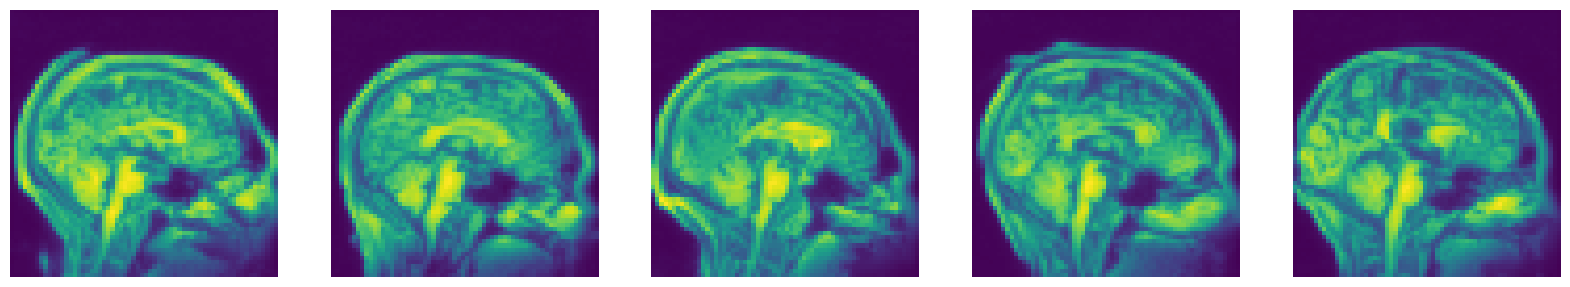

In [99]:
import matplotlib.pyplot as plt
import torch

fig, axs = plt.subplots(1, 5, figsize=(20, 20))

for idx, ax in enumerate(axs):
    ax.imshow(samples[0][idx][0].cpu()) # moving it to the cpu because the generator is on the gpu
    ax.axis('off')
plt.show()


<br>

---

<br>

## **Question 2**  (25%)

Using the data generated in **Question 1**, create a PyTorch `TensorDataset` and a `DataLoader` for the training set.

Using the provided corrupted images inside `test_set.npy`, create another `TensorDataset` and a `DataLoader` for the test set.

The training dataset should provide batches of brain images generated in **Question 1** and should corrupt these images appropriately so that they resemble images in the test set. The dataset should also pair each image with its corresponding un-corrupted image as a label.

The test dataset should provide the corrupted images provided, for which no labels are available.

Display here ten images of your training dataset and ten images of your test dataset, and their corresponding labels when available.

<br>



(1, 64, 64) torch.Size([300, 1, 64, 64])


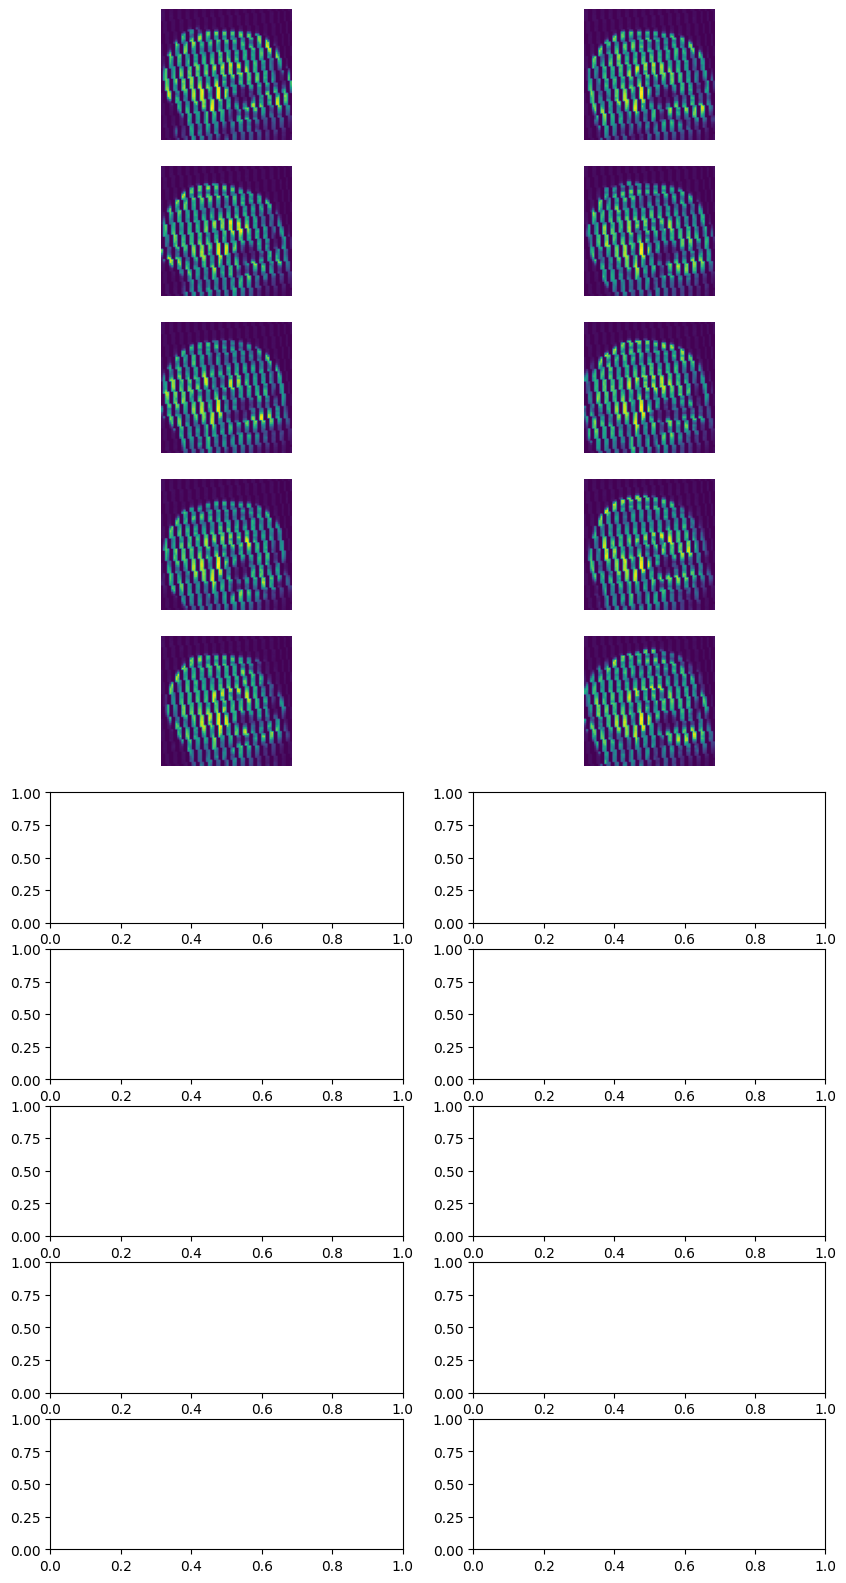

In [123]:
# Tensor dataset and dataloader for the training set
# Training set
from torchvision import datasets, transforms
import torch
from torchvision.transforms import Lambda

# samples_torch = torch.tensor(samples)

# create a training dataset that takes the images from question_1 and corrupt them as the one they gave us

test_mask_temp = test_set[0]

condition = (test_mask_temp == 0)

new_mask = np.where(condition, 0.0,1.0)

print(new_mask.shape, loaded_samples_tensor.shape)

corr_images = loaded_samples_tensor * new_mask.squeeze()

fig, axs = plt.subplots(10, 2, figsize=(10, 20))

for idx in range(10):
    ax = axs[idx // 2, idx % 2]  # Access 2D grid
    ax.imshow(corr_images[idx].squeeze().numpy())  # Grayscale display
    ax.axis('off')


# # Tensor dataset and dataloader for the test set





<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing image lines of the provided test dataset.

Once you have trained your architecture, display here ten images of the test set with the recovered lines filled in.

Additionally, save the test data with the missing values filled in into a numpy file called `test_set_nogaps.npy`. These images should be **in the same order** as those in the `test_set.npy` file and should have the same pixel size of 64x64. **Any images not contained in the `test_set_nogaps.npy` file or incorrectly ordered will not be marked.**

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


<br>

---

<br>